Установка необходимых пакетов и импорт библиотек

In [1]:
!pip3 install anndata
!pip3 install scanpy
!pip3 install matplotlib==3.1.3

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 96 kB 3.1 MB/s 
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 2.0 MB 5.2 MB/s 
     |████████████████████████████████| 9.4 MB 42.0 MB/s 
     |████████████████████████████████| 88 kB 6.4 MB/s 
     |████████████████████████████████| 295 kB 38.8 MB/s 
     |████████████████████████████████| 965 kB 43.4 MB/s 
     |████████████████████████████████| 1.1 MB 9.6 MB/s 
     |████████████████████████████████| 63 kB 1.7 MB/s 
  Created wheel for umap-learn: filename=umap_learn-0.5.3-py3-none-any.whl size=82829 sha256=6592c0329524fe14e2e803a3d88db5c344a2bdcc90893415435b91ac427e1038
  Stored in directory: /root/.cache/pip/wheels/a9/3a/67/06a8950e053725912e6a8c42c4a3a241410f6487b8402542ea
  Created wheel for pynndescent: filename=pynndescent-0.5.8-py3-none-any.whl size

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 13.1 MB 5.2 MB/s 
  Attempting uninstall: matplotlib
    Found existing installation: matplotlib 3.6.2
    Uninstalling matplotlib-3.6.2:
      Successfully uninstalled matplotlib-3.6.2
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
scanpy 1.9.1 requires matplotlib>=3.4, but you have matplotlib 3.1.3 which is incompatible.


In [2]:
import pandas as pd
import seaborn as sns; sns.set_theme()
import numpy as np
import matplotlib.pyplot as plt
import anndata as ad
import scanpy as sc
from tqdm.notebook import tqdm
from matplotlib.cm import get_cmap
from matplotlib.colors import ListedColormap

# Шаг 1 Загружаем файлы
Скачиваем отдельные файлы с каунтами из датасета - https://www.ncbi.nlm.nih.gov/geo/query/acc.cgi?acc=GSE103967

Нас интересуют файлы, соответсвующие клеткам "CD45- Epcam+ (4-6 weeks)

In [3]:
gsm_list = [
            ('7017', '1395'),
            ('7018', '1396'),
            ('7019', '1398'),
            ('7020', '1458'),
            ('7021', '1459'),
            ('7022', '1539'),
            ('7023', '1540'),
            ('7024', '1541'),
            ('7025', '1542'),
            ('7026', '1544'),
            ('7027', '1545'),
            ('7028', '1546'),
            ('7029', '1646'),
            ('7030', '1647'),
            ('7031', '1648'),
            ('7032', '1649'),
            ('7033', '1751'),
            ('7034', '1753'),
            ('7035', '1792'),
            ('7036', '1793'),
            ('7037', '1795'),
]

for gsm, ab in gsm_list:
  link = str('https://ftp.ncbi.nlm.nih.gov/geo/samples/GSM2787nnn/GSM278' + gsm + '/suppl/GSM278' + gsm + '%5FAB' + ab + '%2Etxt%2Egz')
  !wget -c -nv $link
  name = str('GSM278' + gsm + '_AB' + ab + '.txt.gz')
  !gzip -f -d $name

2022-12-20 16:58:06 URL:https://ftp.ncbi.nlm.nih.gov/geo/samples/GSM2787nnn/GSM2787017/suppl/GSM2787017%5FAB1395%2Etxt%2Egz [484276/484276] -> "GSM2787017_AB1395.txt.gz" [1]
2022-12-20 16:58:07 URL:https://ftp.ncbi.nlm.nih.gov/geo/samples/GSM2787nnn/GSM2787018/suppl/GSM2787018%5FAB1396%2Etxt%2Egz [398303/398303] -> "GSM2787018_AB1396.txt.gz" [1]
2022-12-20 16:58:08 URL:https://ftp.ncbi.nlm.nih.gov/geo/samples/GSM2787nnn/GSM2787019/suppl/GSM2787019%5FAB1398%2Etxt%2Egz [490402/490402] -> "GSM2787019_AB1398.txt.gz" [1]
2022-12-20 16:58:09 URL:https://ftp.ncbi.nlm.nih.gov/geo/samples/GSM2787nnn/GSM2787020/suppl/GSM2787020%5FAB1458%2Etxt%2Egz [393417/393417] -> "GSM2787020_AB1458.txt.gz" [1]
2022-12-20 16:58:10 URL:https://ftp.ncbi.nlm.nih.gov/geo/samples/GSM2787nnn/GSM2787021/suppl/GSM2787021%5FAB1459%2Etxt%2Egz [482002/482002] -> "GSM2787021_AB1459.txt.gz" [1]
2022-12-20 16:58:11 URL:https://ftp.ncbi.nlm.nih.gov/geo/samples/GSM2787nnn/GSM2787022/suppl/GSM2787022%5FAB1539%2Etxt%2Egz [34815

# Шаг 2 Объединяем все файлы в один
В итоге получается 1 большая матрица размером 34016 rows × 8064 columns

In [6]:
import glob2

data = []

for name in glob2.glob('/content/*'):
    if str(name) == '/content/sample_data':
        continue
    DataFrame1 = pd.read_csv(str(name), sep='\t')
    data.append(DataFrame1)

count = pd.concat(data, axis=1)
count

,W340241,W340242,W340243,W340244,W340245,W340246,W340247,W340248,W340249,W340250,...,W292423,W292424,W292425,W292426,W292427,W292428,W292429,W292430,W292431,W292432
0610005C13Rik,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
0610007C21Rik,0,0,0,0,0,0,0,0,0,0,...,0,1,0,1,0,0,0,0,0,1
0610007L01Rik,0,0,0,0,0,0,2,0,0,0,...,0,0,0,0,0,0,0,0,1,0
0610007P08Rik,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
0610007P14Rik,0,0,0,0,0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
snoZ159,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
snoZ178,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
snoZ39,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
snoZ40,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


# Шаг 3 Экспрессия маркерных генов

Сопоставляем ID-шники клеток (столцы в файлах из GEO) с ID-шниками от авторов (https://drive.google.com/file/d/1OaqaGULwMUlQ7SkdADOFMW5NrQbGtA3G/view?usp=sharing) -- они должны совпадать. Дальше работаем только с клетками из файла авторов.




In [7]:
link_2='https://drive.google.com/file/d/1OaqaGULwMUlQ7SkdADOFMW5NrQbGtA3G/view?usp=sharing'
link_2='https://drive.google.com/uc?id=' + link_2.split('/')[-2]
DataFrame2 = pd.read_csv(link_2, sep='\t')
DataFrame2 = DataFrame2.rename(columns={"Unnamed: 0": "cells", "clust": "clust", "group": "group"})
DataFrame2

,cells,clust,group
0,W160351,2,mTEC-IV
1,W160352,32,mTEC-III
2,W160353,35,mTEC-II
3,W160357,34,mTEC-II
4,W160358,3,mTEC-IV
...,...,...,...
2336,W271100,30,mTEC-II
2337,W271101,23,mTEC-III
2338,W271102,35,mTEC-II
2339,W271106,20,mTEC-I


In [9]:
intersection = set(pd.unique(DataFrame2.cells)).intersection(set(pd.unique(count.columns)))
inter = count.loc[:, intersection]

markers = ['Ctsl', 'Psmb11', 'Prss16', 'Ascl1', 'Sox4', 'Ccl21a', 'Apoe', 'Ly6a', 'Ccl21c', 'Aire', 'Hdc', 'Ubd', \
           'Cd52', 'Ccl20', 'Serpinb6a', 'Ly6d', 'Pigr', 'Car8', 'Lcn2', 'Trpm5', 'Avil', 'Gnb3', 'Lrmp']

In [10]:
for column in inter:
    inter[column] = (1e6/inter[column].sum())*inter[column]
inter

,W416185,W339770,W341041,W378604,W291738,W431598,W292259,W378842,W291918,W314825,...,W378613,W340413,W378531,W291899,W314974,W378981,W314928,W378741,W314853,W378745
0610005C13Rik,0.0,0.000000,0.0,0.0,0.000000,0.00000,0.0,0.0,0.0,0.000000,...,0.000000,0.0,0.000000,0.0,0.000000,0.0,0.000000,0.0,0.0,0.0
0610007C21Rik,0.0,0.000000,0.0,0.0,1246.882793,0.00000,0.0,0.0,0.0,0.000000,...,0.000000,0.0,247.157687,0.0,0.000000,0.0,1602.564103,0.0,0.0,0.0
0610007L01Rik,0.0,401.606426,0.0,0.0,0.000000,0.00000,0.0,0.0,0.0,267.165375,...,1550.387597,0.0,0.000000,0.0,0.000000,0.0,0.000000,0.0,0.0,0.0
0610007P08Rik,0.0,0.000000,0.0,0.0,0.000000,0.00000,0.0,0.0,0.0,0.000000,...,0.000000,0.0,0.000000,0.0,0.000000,0.0,0.000000,0.0,0.0,0.0
0610007P14Rik,0.0,0.000000,0.0,0.0,0.000000,194.32569,0.0,0.0,0.0,0.000000,...,0.000000,0.0,0.000000,0.0,532.765051,0.0,534.188034,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
snoZ159,0.0,0.000000,0.0,0.0,0.000000,0.00000,0.0,0.0,0.0,0.000000,...,0.000000,0.0,0.000000,0.0,0.000000,0.0,0.000000,0.0,0.0,0.0
snoZ178,0.0,0.000000,0.0,0.0,0.000000,0.00000,0.0,0.0,0.0,0.000000,...,0.000000,0.0,0.000000,0.0,0.000000,0.0,0.000000,0.0,0.0,0.0
snoZ39,0.0,0.000000,0.0,0.0,0.000000,0.00000,0.0,0.0,0.0,0.000000,...,0.000000,0.0,0.000000,0.0,0.000000,0.0,0.000000,0.0,0.0,0.0
snoZ40,0.0,0.000000,0.0,0.0,0.000000,0.00000,0.0,0.0,0.0,0.000000,...,0.000000,0.0,0.000000,0.0,0.000000,0.0,0.000000,0.0,0.0,0.0


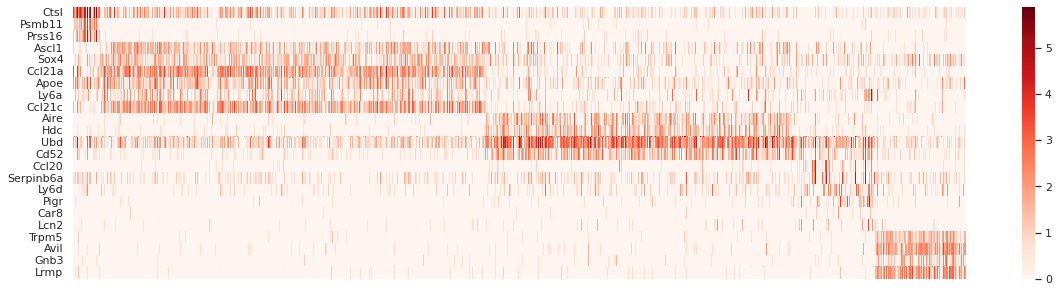

In [21]:
columns_inter = set(DataFrame2.cells).intersection(set(count.columns))
count_inter = count.loc[:, columns_inter]
count_mark = count_inter.loc[markers, :]

select_count = count_mark.copy()
select_count.loc['group', :] = 0
cells_group = DataFrame2.set_index('cells').T[columns_inter]

select_count.loc['group', :] = cells_group.loc['group', :]
select_count.sort_values(by=['group'], axis=1, inplace=True)

f, ax = plt.subplots(figsize=(20, 5))
ax = sns.heatmap(np.log(select_count.drop(index=['group']).astype(float) + 1), yticklabels=True, xticklabels=False, cmap='Reds')
plt.show()
#ax.figure.savefig("output.png", transparent=True, dpi=200, bbox_inches = "tight")

# Шаг 4 Визуализируем все 2341 клетки на UMAP и PCA

Для этого предлагается использовать пакеты anndata (https://anndata-tutorials.readthedocs.io/en/latest/getting-started.html) и scanpy (https://scanpy-tutorials.readthedocs.io/en/latest/pbmc3k.html).

In [12]:
# counts_norm - normalized data

adata = ad.AnnData(inter.T)
sc.pp.log1p(adata)
# adata.var_names = list(inter.index)
# adata.obs_names = [f"Cell_{i:d}" for i in range(adata.n_obs)]

<ipython-input-12-3a0344506b77>:3: FutureWarning: X.dtype being converted to np.float32 from float64. In the next version of anndata (0.9) conversion will not be automatic. Pass dtype explicitly to avoid this warning. Pass `AnnData(X, dtype=X.dtype, ...)` to get the future behavour.
  adata = ad.AnnData(inter.T)


In [13]:
# cells_type_data - cell type provided by authors
adata.obs["cell_type"] = cells_group.loc['group', :].values

In [14]:
sc.pp.pca(adata, n_comps=50)

In [15]:
colors = ['red', 'green', 'blue', 'pink', 'orange']
cmap = get_cmap(ListedColormap(colors))

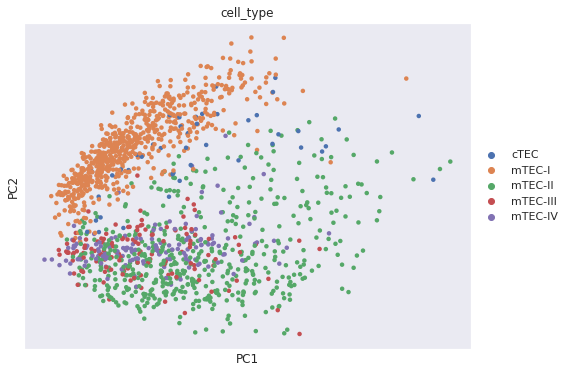

In [23]:
f, ax = plt.subplots(figsize=(8, 6))
sc.pl.pca(adata, color=['cell_type'], colorbar_loc=None, color_map=cmap, ax=ax)
ax.figure.savefig("umap.png", transparent=True, dpi=200, bbox_inches = "tight")

In [17]:
sc.pp.neighbors(adata, n_neighbors=10, n_pcs=40)
sc.tl.umap(adata)

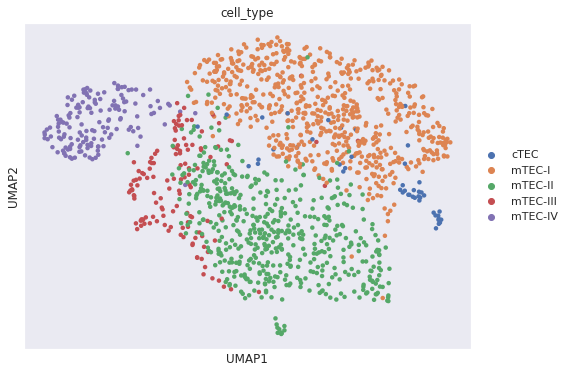

In [22]:
f, ax = plt.subplots(figsize=(8, 6))
sc.pl.umap(adata, color=['cell_type'], colorbar_loc=None, color_map=cmap, ax=ax)
plt.show()
ax.figure.savefig("pca.png", transparent=True, dpi=200, bbox_inches = "tight")